## Part II - (Borrowers and The Factors that affect them)
### by (Thomas Oluwasegun Olubunmi)

### Investigation Overview
> In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower Rate. The main focus was on the credit grade, monthly loan payment, borrower's Prosper rating, prosper score and borrower's stated monthly income.


### Dataset Overview
>Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The objectives of this project are to summarize the characteristics of features that have effect on the interest rate and to get some ideas about the relationships among multiple features using summary statistics and data visualizations


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:

data = pd.read_csv("prosperLoanData.csv")

cols = ['ProsperScore', 'BorrowerRate', 'MonthlyLoanPayment', "CreditGrade", 'IncomeVerifiable', 'ProsperRating (Alpha)', 
        'IsBorrowerHomeowner']
df = data[cols]

# wrangling data
df = df[(~df.BorrowerRate.isna())]
            

# Convert ProsperRating and credit grade into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype("category")
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].cat.set_categories(
                                    new_categories = rate_order, ordered = True)

grade_order = ['HR','E','D','C','B','A','AA']
df['CreditGrade'] = df['CreditGrade'].astype("category")
df['CreditGrade'] = df['CreditGrade'].cat.set_categories(
                                    new_categories = rate_order, ordered = True)

### Distribution of Borrower Rate
>The distribution of borrower rate is multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered at 0.3. Additionally, there is a very sharp peak between 0.32 and 0.36. All loans have Borrower rate less than 0.4

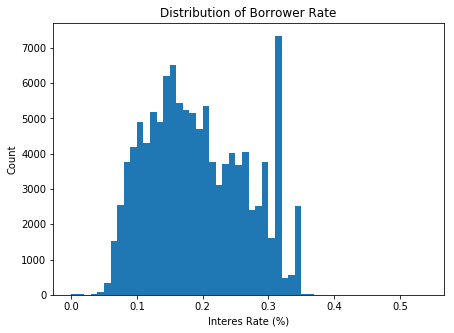

In [3]:
# set the figure size
plt.rcParams['figure.figsize'] = 7, 5
# set the bins
bins = bins = np.arange(0, df["BorrowerRate"].max()+0.05, 0.01)
# plot
plt.hist(data = df, x="BorrowerRate", bins = bins)
# label the axes
plt.ylabel("Count")
plt.xlabel('Interes Rate (%)')
# set the title
plt.title('Distribution of Borrower Rate')
# Show the plot
plt.show()

### Borrower Rate and Credit Grade
> * Credit grade AA has the least borrower rate
> * People with credit grade HR and E will have to get loan at higher interest rate

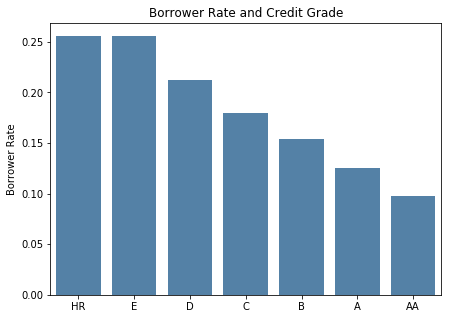

In [4]:
# set the fig size
plt.rcParams['figure.figsize'] = 7, 5
# plot
sns.barplot(data = df,
           x = "CreditGrade",
           y = "BorrowerRate",
           ci = None,
           color = "steelblue")
# label the axes
plt.xlabel("")
plt.ylabel("Borrower Rate")

# # set title
plt.title("Borrower Rate and Credit Grade")
# show the plot
plt.show()

### Prosper Score vs. Monthly Loan Payment
> There is a positive correlation between monthly loan payment and prosper score 


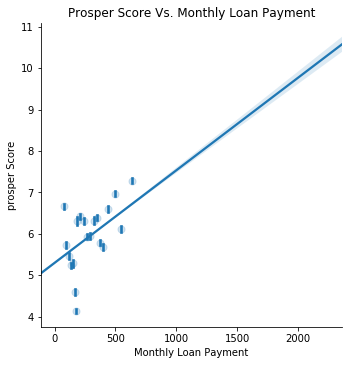

In [5]:

plt.rcParams['figure.figsize'] = 8, 5
sns.lmplot(data = df,
            x = "MonthlyLoanPayment",
            y = "ProsperScore",
           scatter_kws = {"alpha": 0.2},
           x_bins = 20)
# label the axes
plt.xlabel("Monthly Loan Payment")
plt.ylabel("prosper Score")

# set the title
plt.title("Prosper Score Vs. Monthly Loan Payment");

plt.show()

### CreditGrade, BorrowerRate and IncomeVerifiable
> * We can see that there is low interest rate for higher credit grade and higher interest rate for lower credit grade'
> * On the average, the interest rate for the borrower with no verifiable income is higher than those with verifiable income.

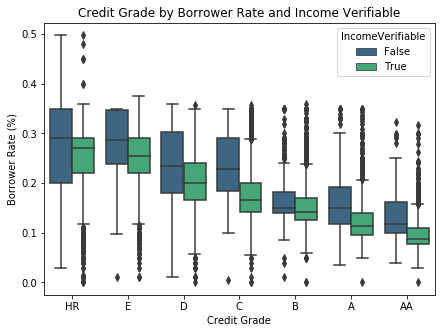

In [6]:
plt.rcParams['figure.figsize'] = 7, 5

sns.boxplot(data = df,
           x = "CreditGrade",
           y = "BorrowerRate",
           hue = "IncomeVerifiable",
            palette = "viridis"
)
# label the axes
plt.ylabel("Borrower Rate (%)")
plt.xlabel("Credit Grade")
# set title
plt.title("Credit Grade by Borrower Rate and Income Verifiable")
# show the plot
plt.show()


### Borrower Rate by Rating and Home Owner

> For both Home owner and those who do not own home, the borrower Rate increases for people with HR-C raings. But for people with B-AA ratings, the rate decreases.
However, the interest rate for home owner is lower than those that do not own home.


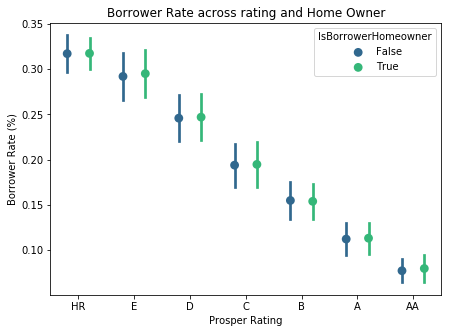

In [20]:
# Set the figure size
plt.rcParams['figure.figsize'] = 7, 5
# plot
ax = sns.pointplot(data = df, x = 'ProsperRating (Alpha)', 
                   y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                   palette = 'viridis', linestyles = '', 
                   dodge = 0.4, ci='sd')
# Set the title
plt.title('Borrower Rate across rating and Home Owner')
# Label the axis
plt.ylabel('Borrower Rate (%)')
plt.xlabel('Prosper Rating');